In [3]:
import numpy as np
from datetime import datetime
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 28,'legend.fontsize':32})
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
import fur.path_assistant as path_assistant
from fur.waveform_reader import read_waveform
from fur.finding_period import get_period
from fur.fluctuations import get_fluctiation_and_noise_var, get_average_signal
shift = path_assistant.PathAssistant('shift_04_29_2019')

In [4]:
sh = path_assistant.PathAssistant('shift_03_16_2020')
ch2, ch1 = read_waveform(
    sh.get_waveform_path('RefCurve_2020-03-16_25_133747.Wfm.bin'))

In [5]:
# f = open(shift.get_waveform_path("RefCurve_2019-04-30_23_142129.Wfm.csv"))
# ch1 = []
# ch2 = []
# for i in range(500*2600):
#         l=f.readline()
#         c1,c2=[float(x) for x in l.split(";")]
#         ch1.append(c1)
#         ch2.append(c2)
# f.close()

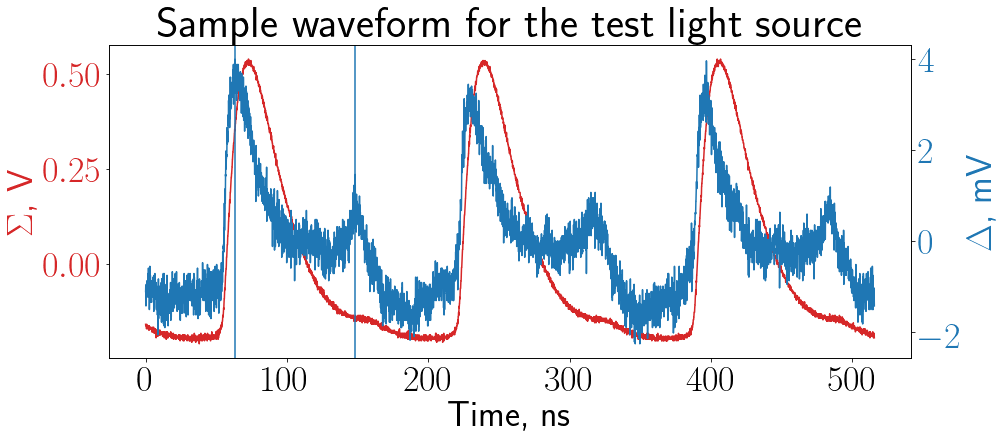

In [32]:
start=205*2600+900+1500+500
end=start+3*2750*50/40
end = int(end)
data1 = ch1[start:end]
data2 = ch2[start:end]
data2=[1000*d2 for d2 in data2]
time = [0.05*t for t in range(len(data1))]
fig, ax1 = plt.subplots(figsize=[15,7])
plt.title('Sample waveform for the test light source')
color = 'tab:red'
ax1.set_xlabel('Time, ns')
ax1.set_ylabel(r'$\Sigma$, V', color=color)
ax1.plot(time,data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel(r'$\Delta$, mV', color=color)  # we already handled the x-label with ax1
ax2.plot(time,data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
t0=63
ax1.axvline(t0)
ax1.axvline(t0+85)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("scope_waveform_test.png",dpi=300, bbox_inches='tight')
plt.show()

In [22]:
prl_images = get_from_config("PRL_images")

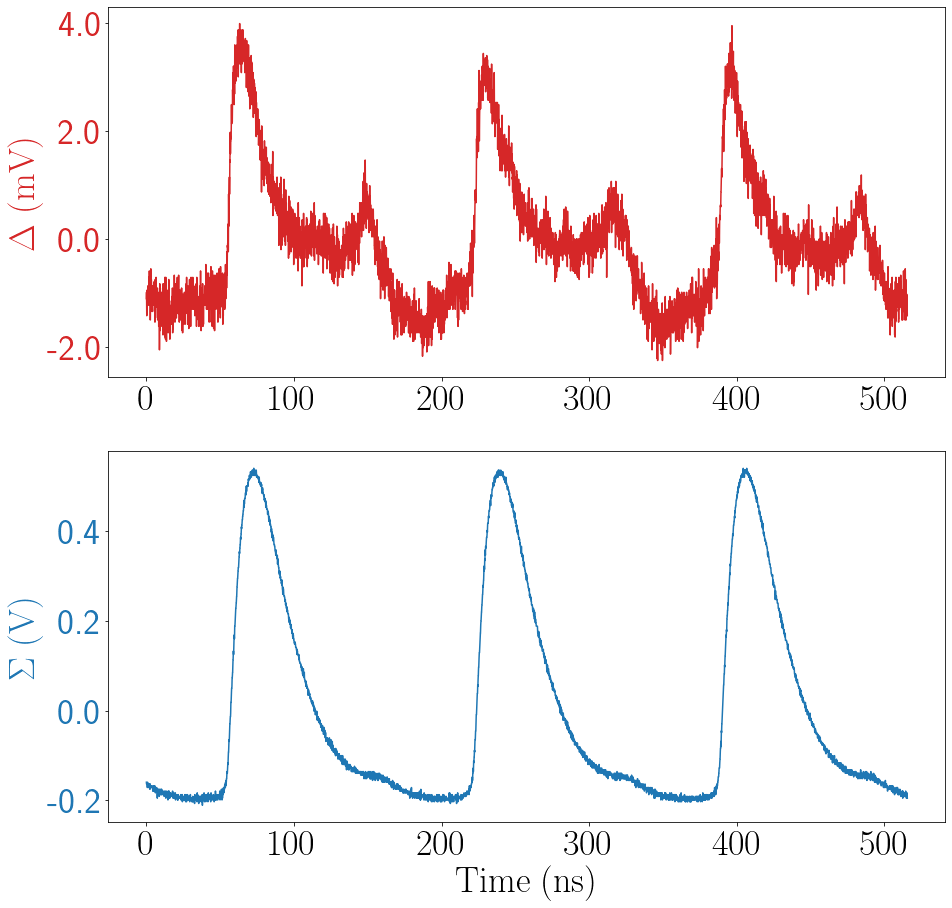

In [23]:
from matplotlib.ticker import FormatStrFormatter
plt.rcParams["text.usetex"] =True
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams.update({'font.size': 36,'legend.fontsize':32})
fig, axs = plt.subplots(2)
color='tab:red'
axs[0].plot(time, data2, color=color)
axs[0].set_ylabel(r"$\Delta\;(\SI{}{mV})$", color=color)
axs[0].tick_params(axis='y', labelcolor=color)
axs[0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
color='tab:blue'
axs[1].plot(time, data1, color=color)
axs[1].set_ylabel(r"$\Sigma\;(\SI{}{V})$", color=color)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.1f}'))
axs[1].set_xlabel(r"$\mathrm{Time}\;(\SI{}{ns})$")
fig.savefig(os.path.join(prl_images,
                             "integrator_and_comb_filter"
                             ,"delta_sigma_waveform.png"),
            dpi=300, bbox_inches='tight')
fig.show()